In [ ]:
!pip install -U opencv-python

     |████████████████████████████████| 60.3 MB 1.3 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


**Menginstall opencv python versi 4.5.4.60 ke dalam google colab**

In [ ]:
# Import All Needed Library
import cv2 
import os
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

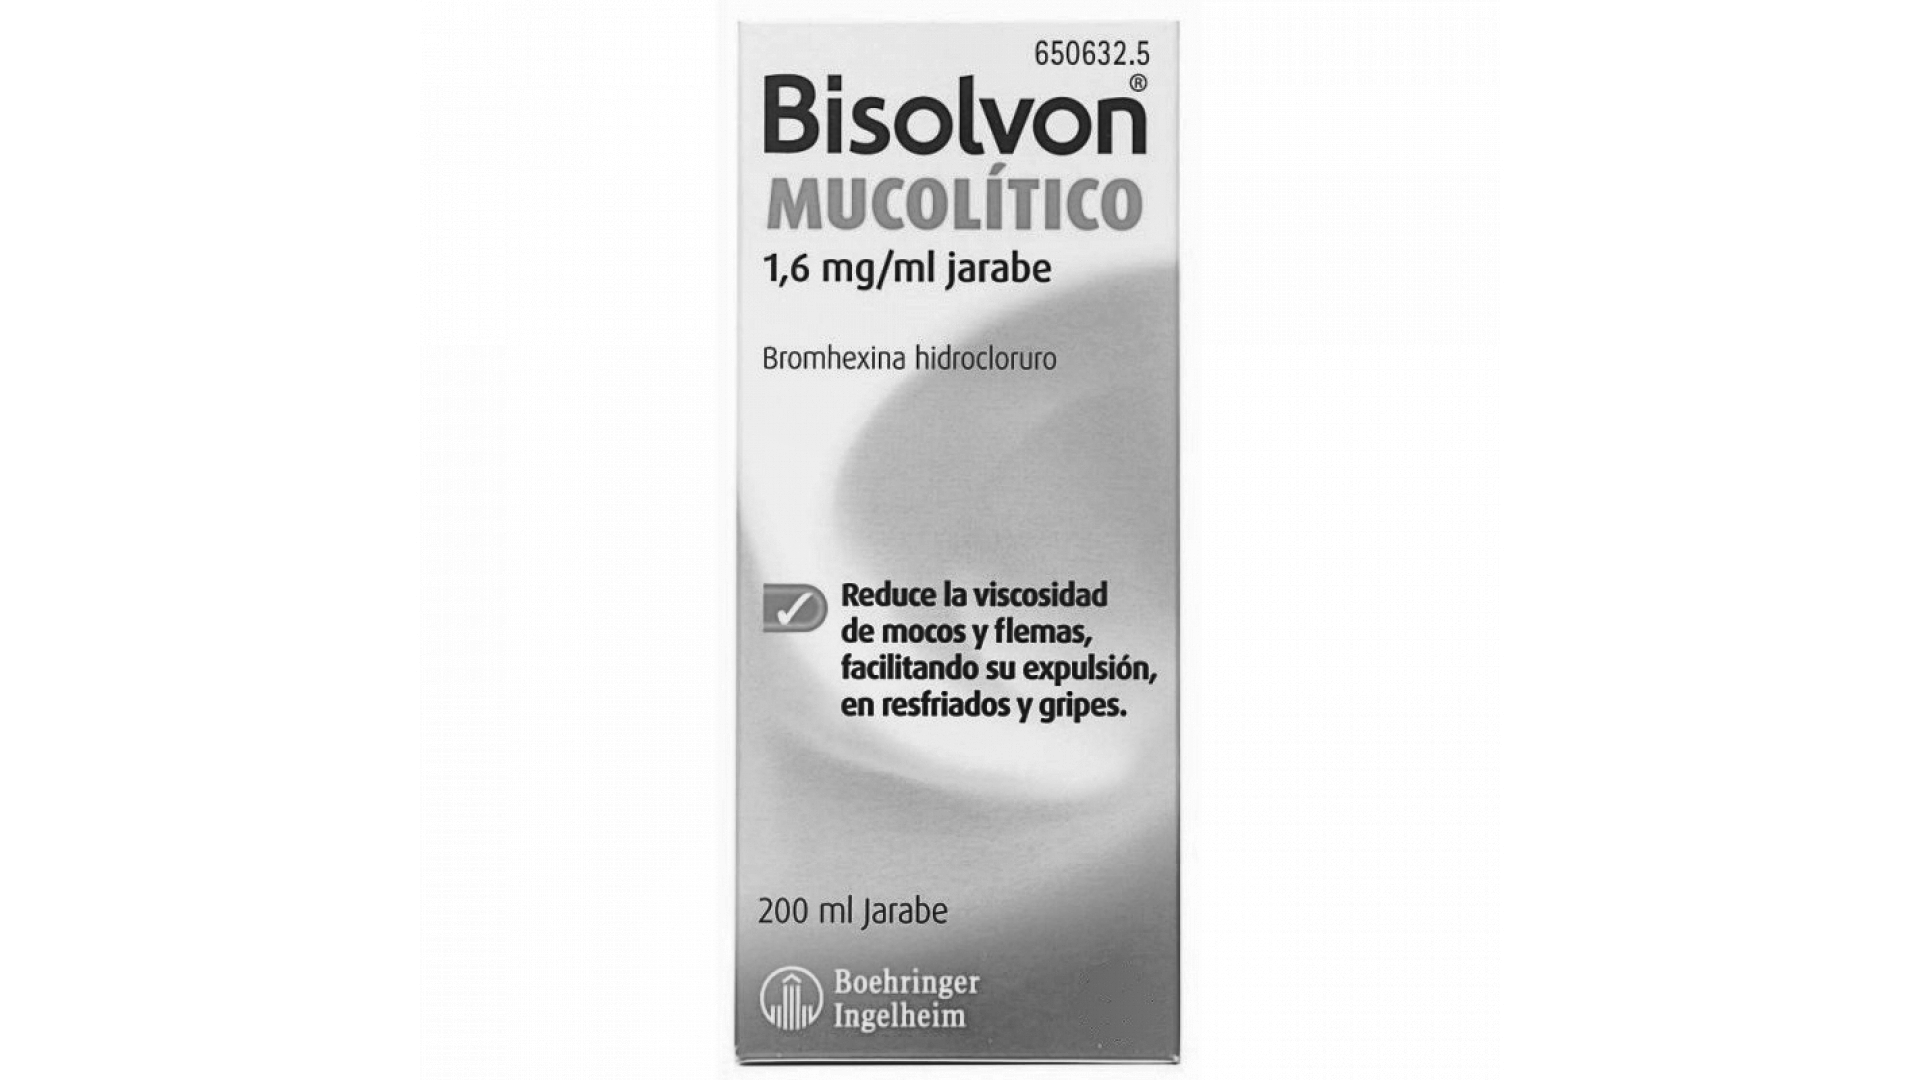

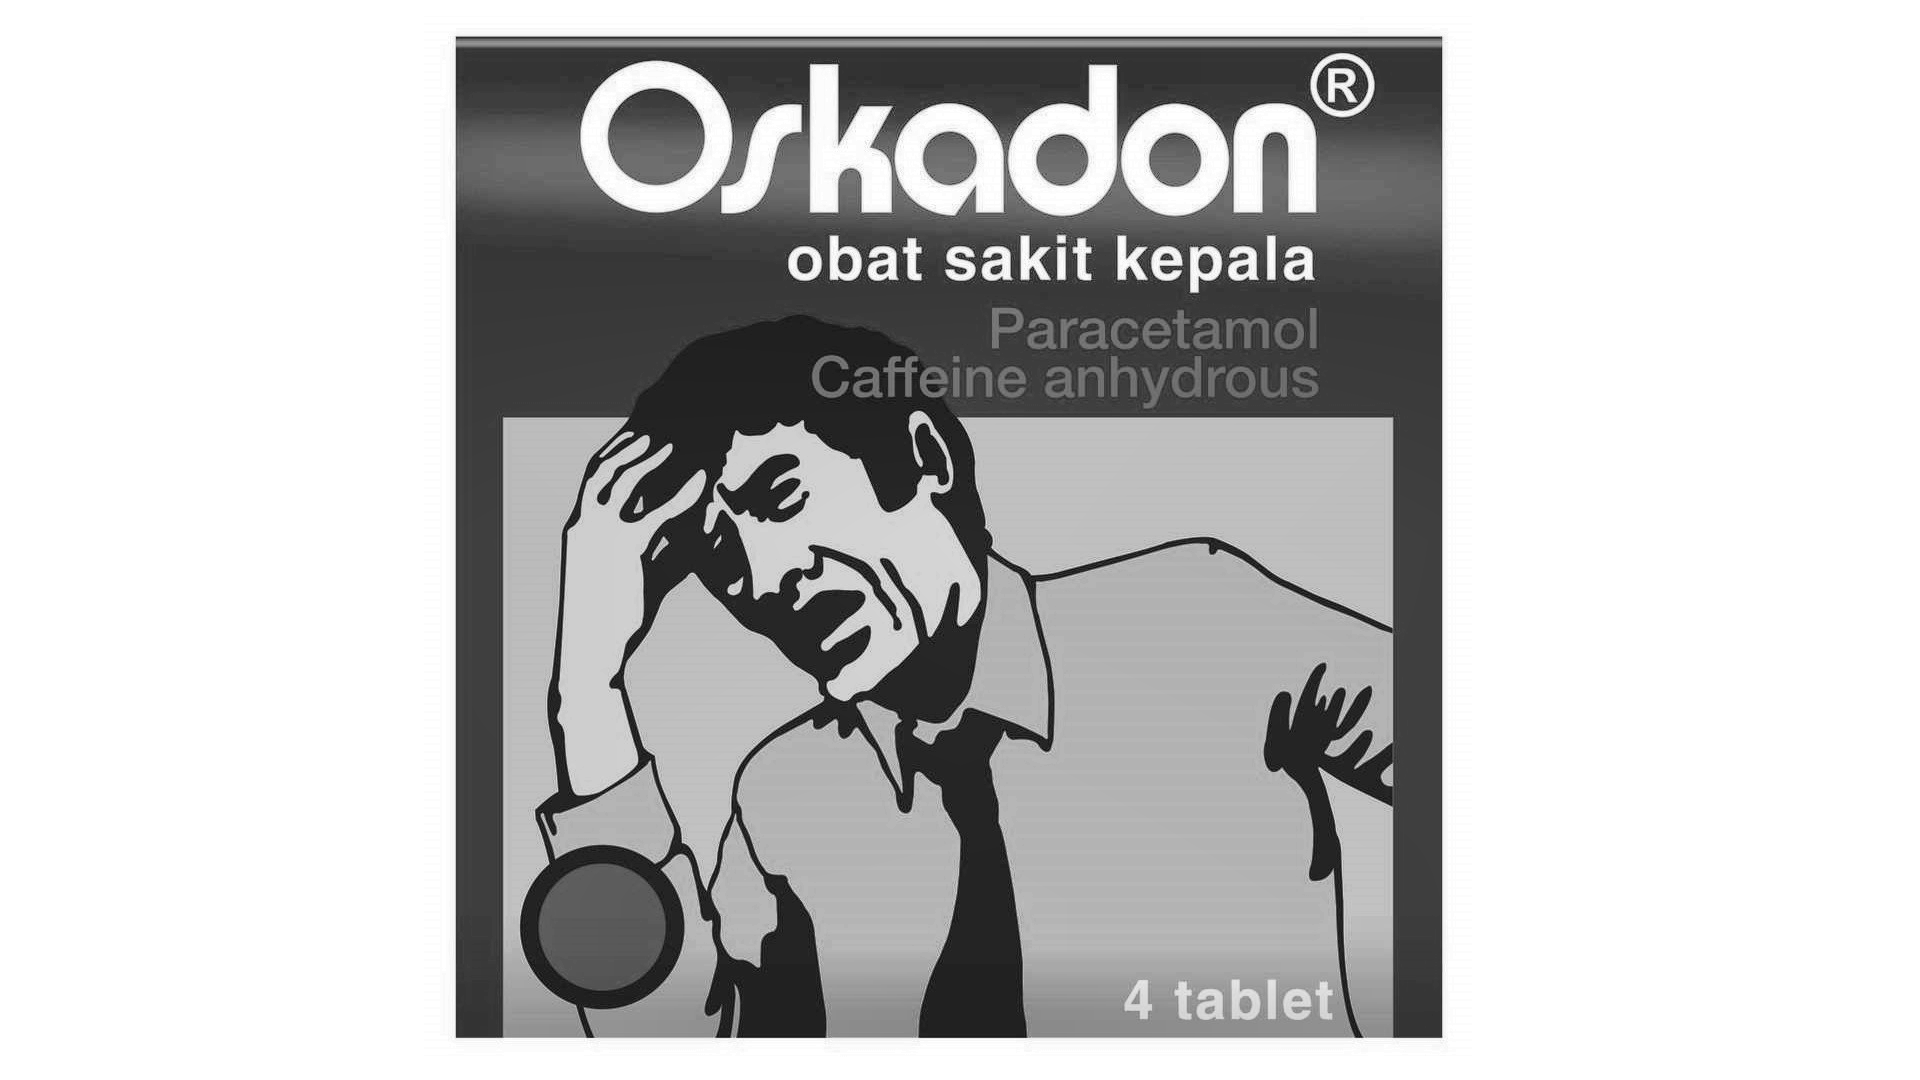

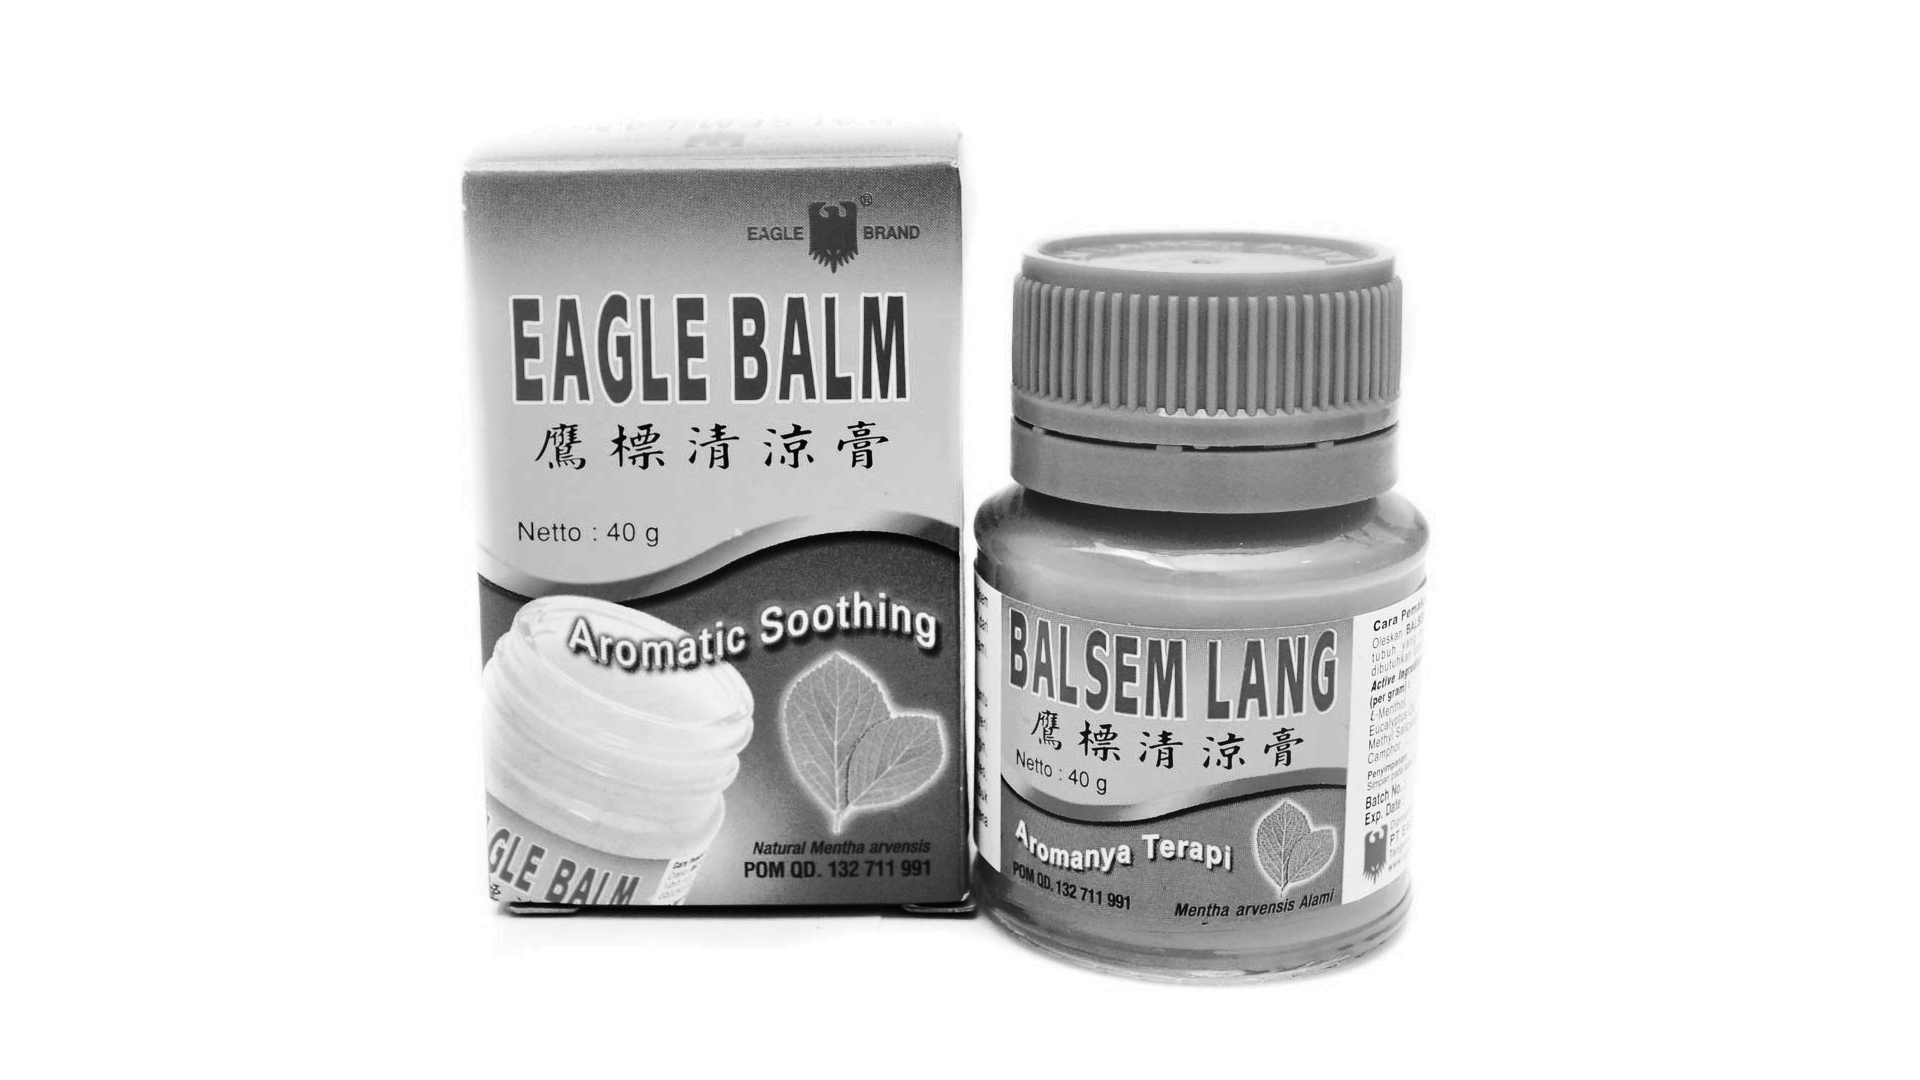

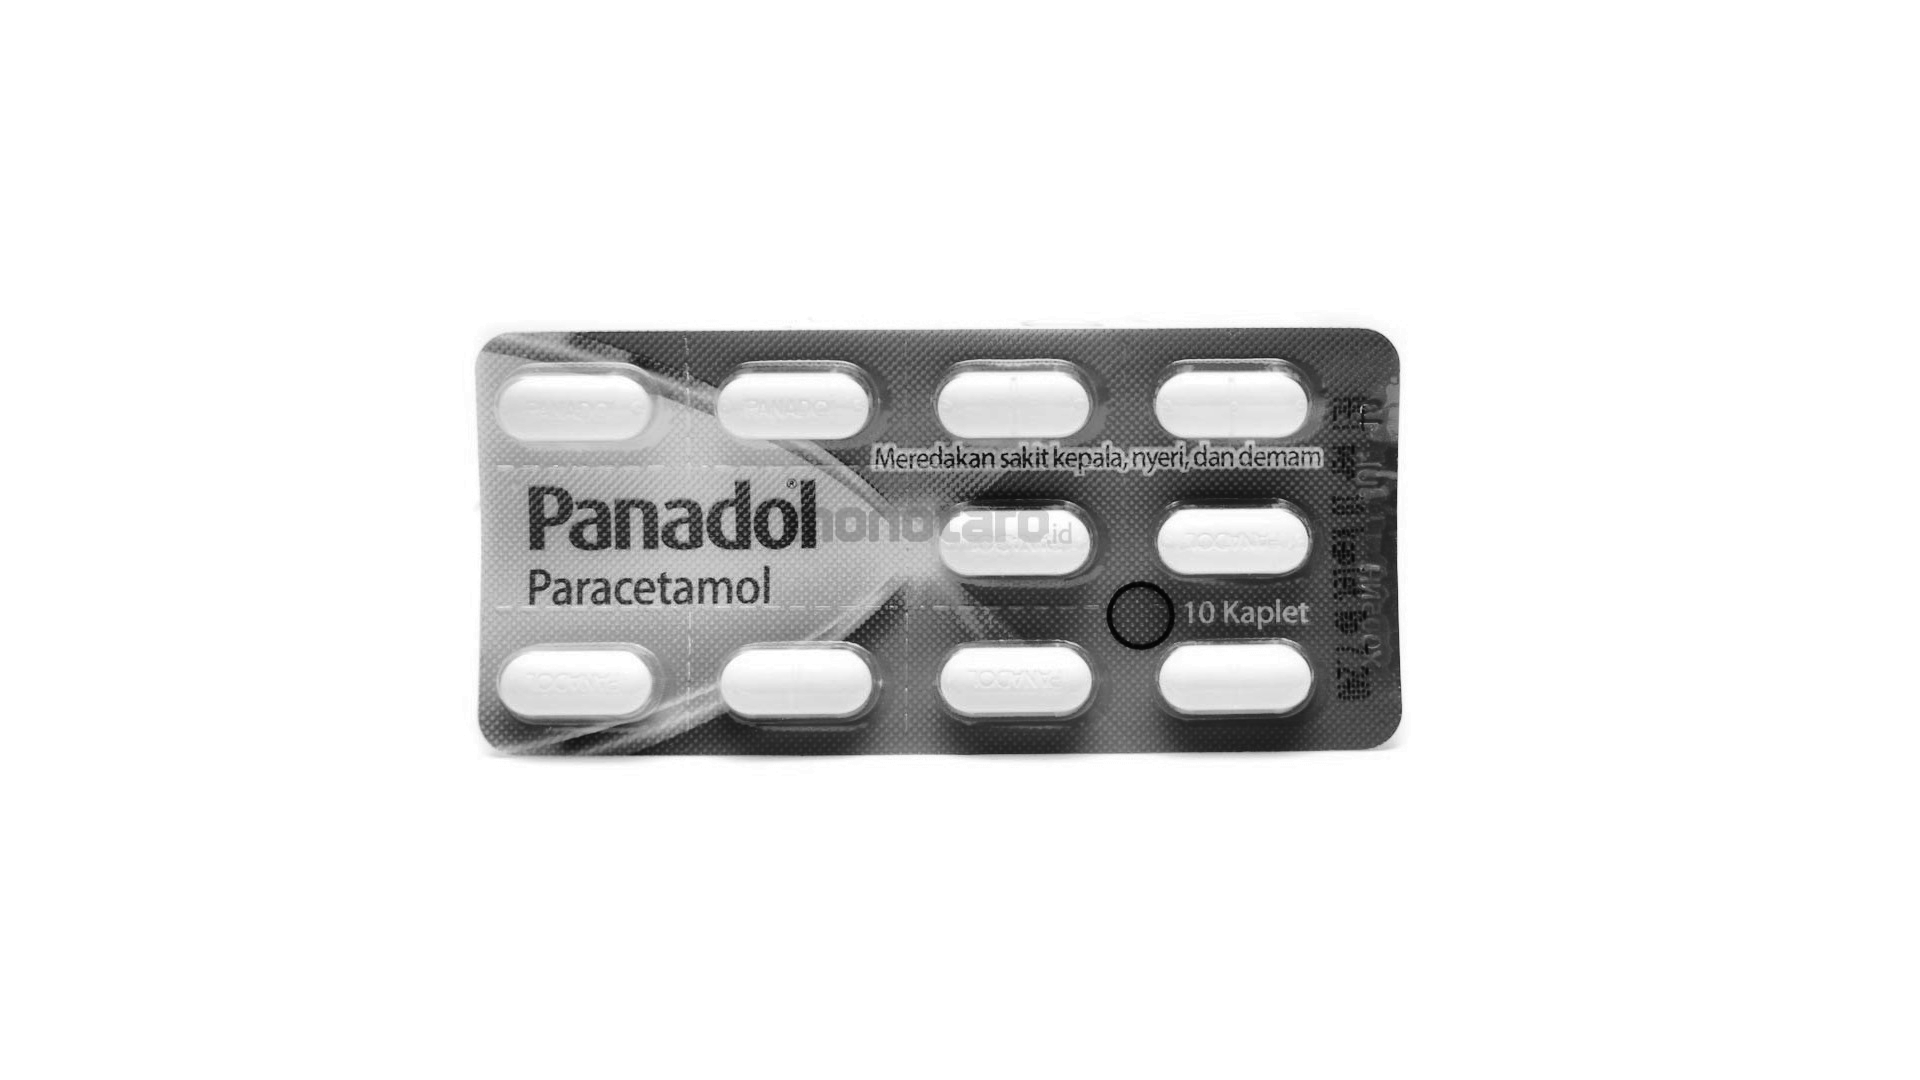

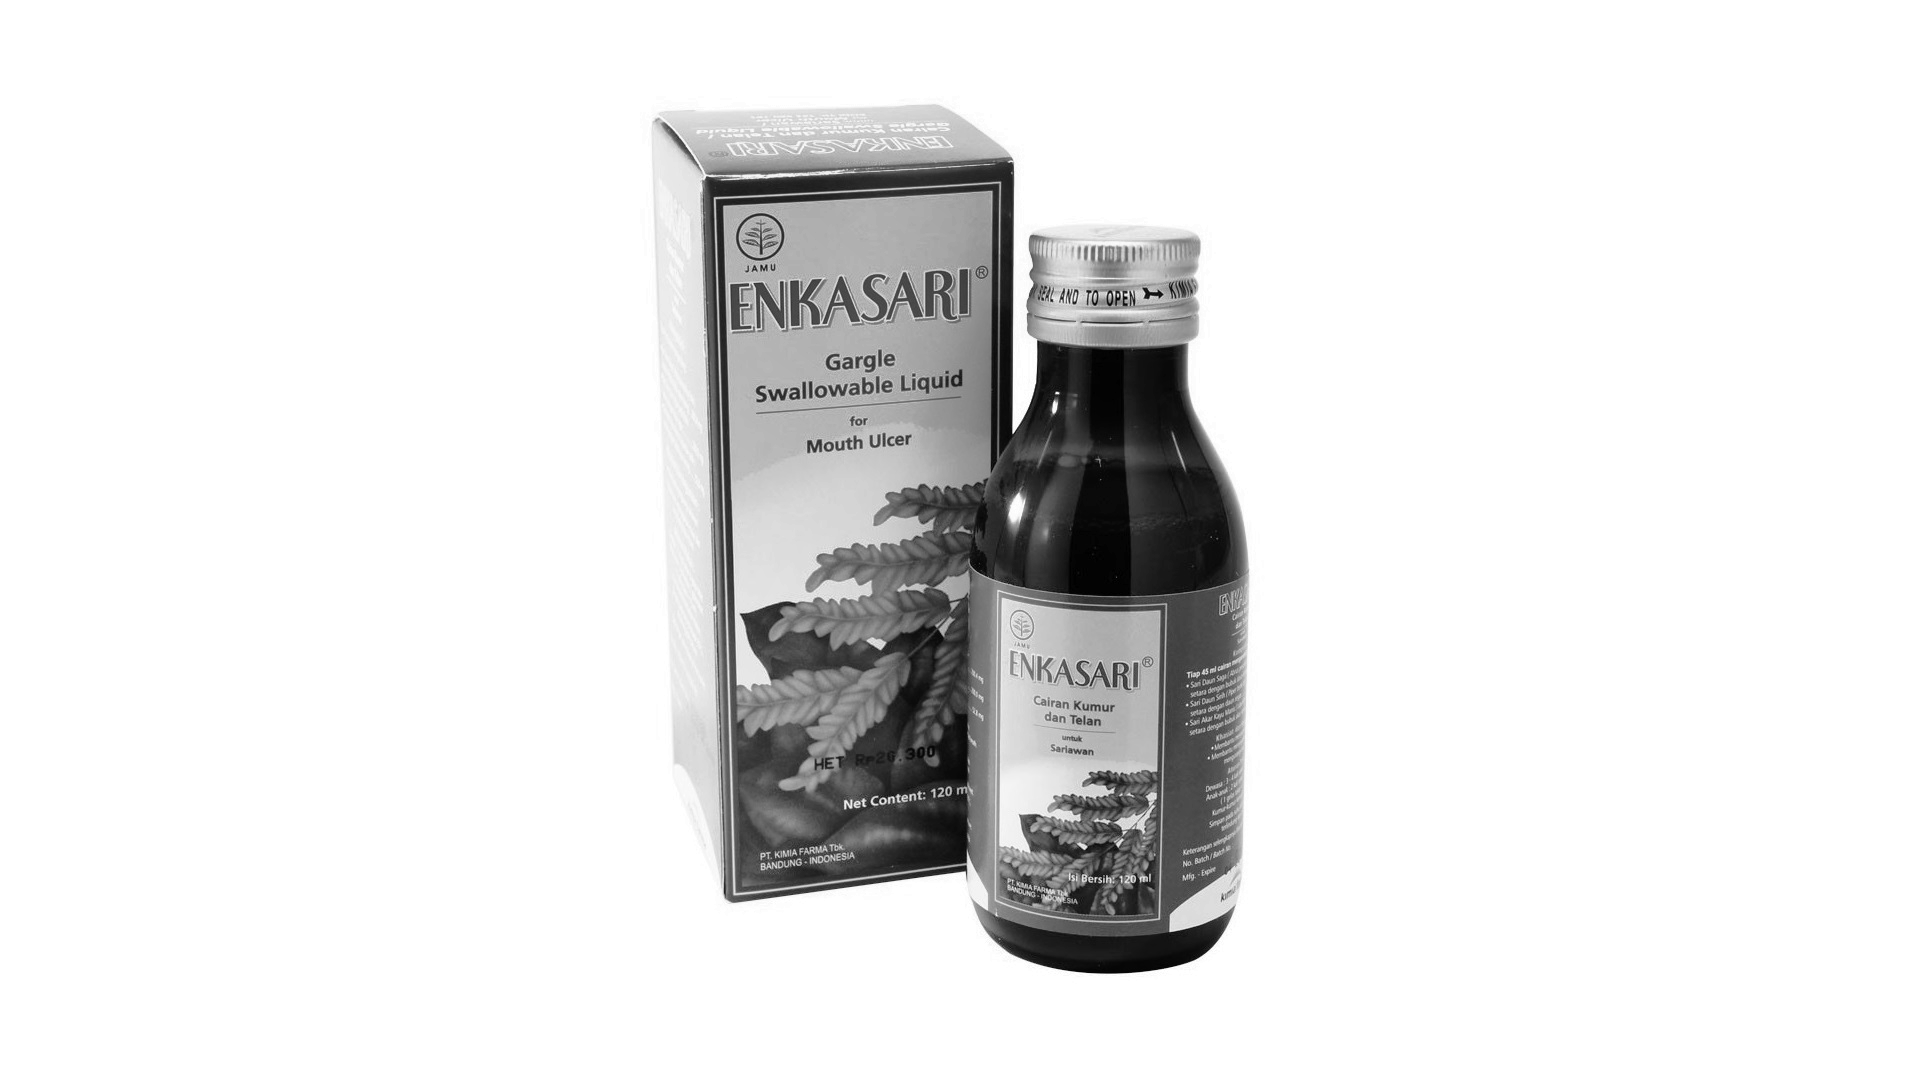

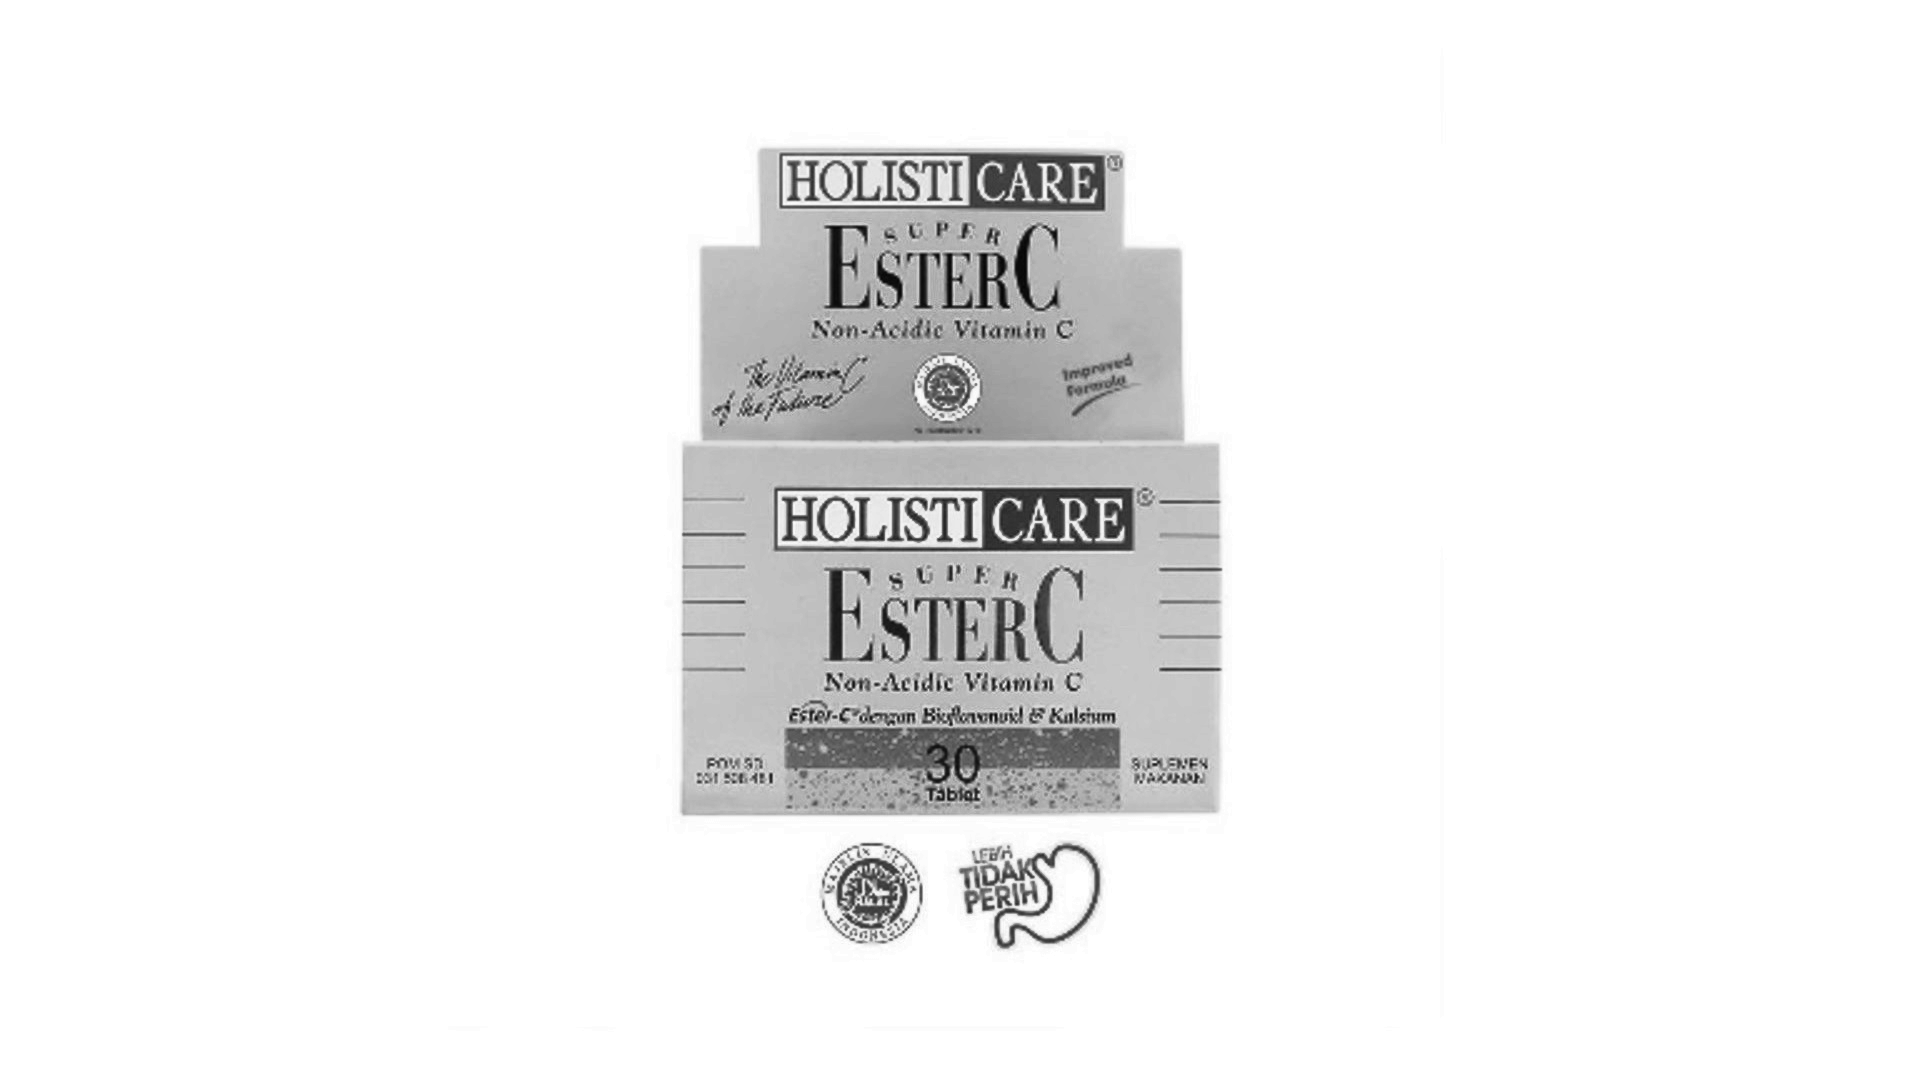

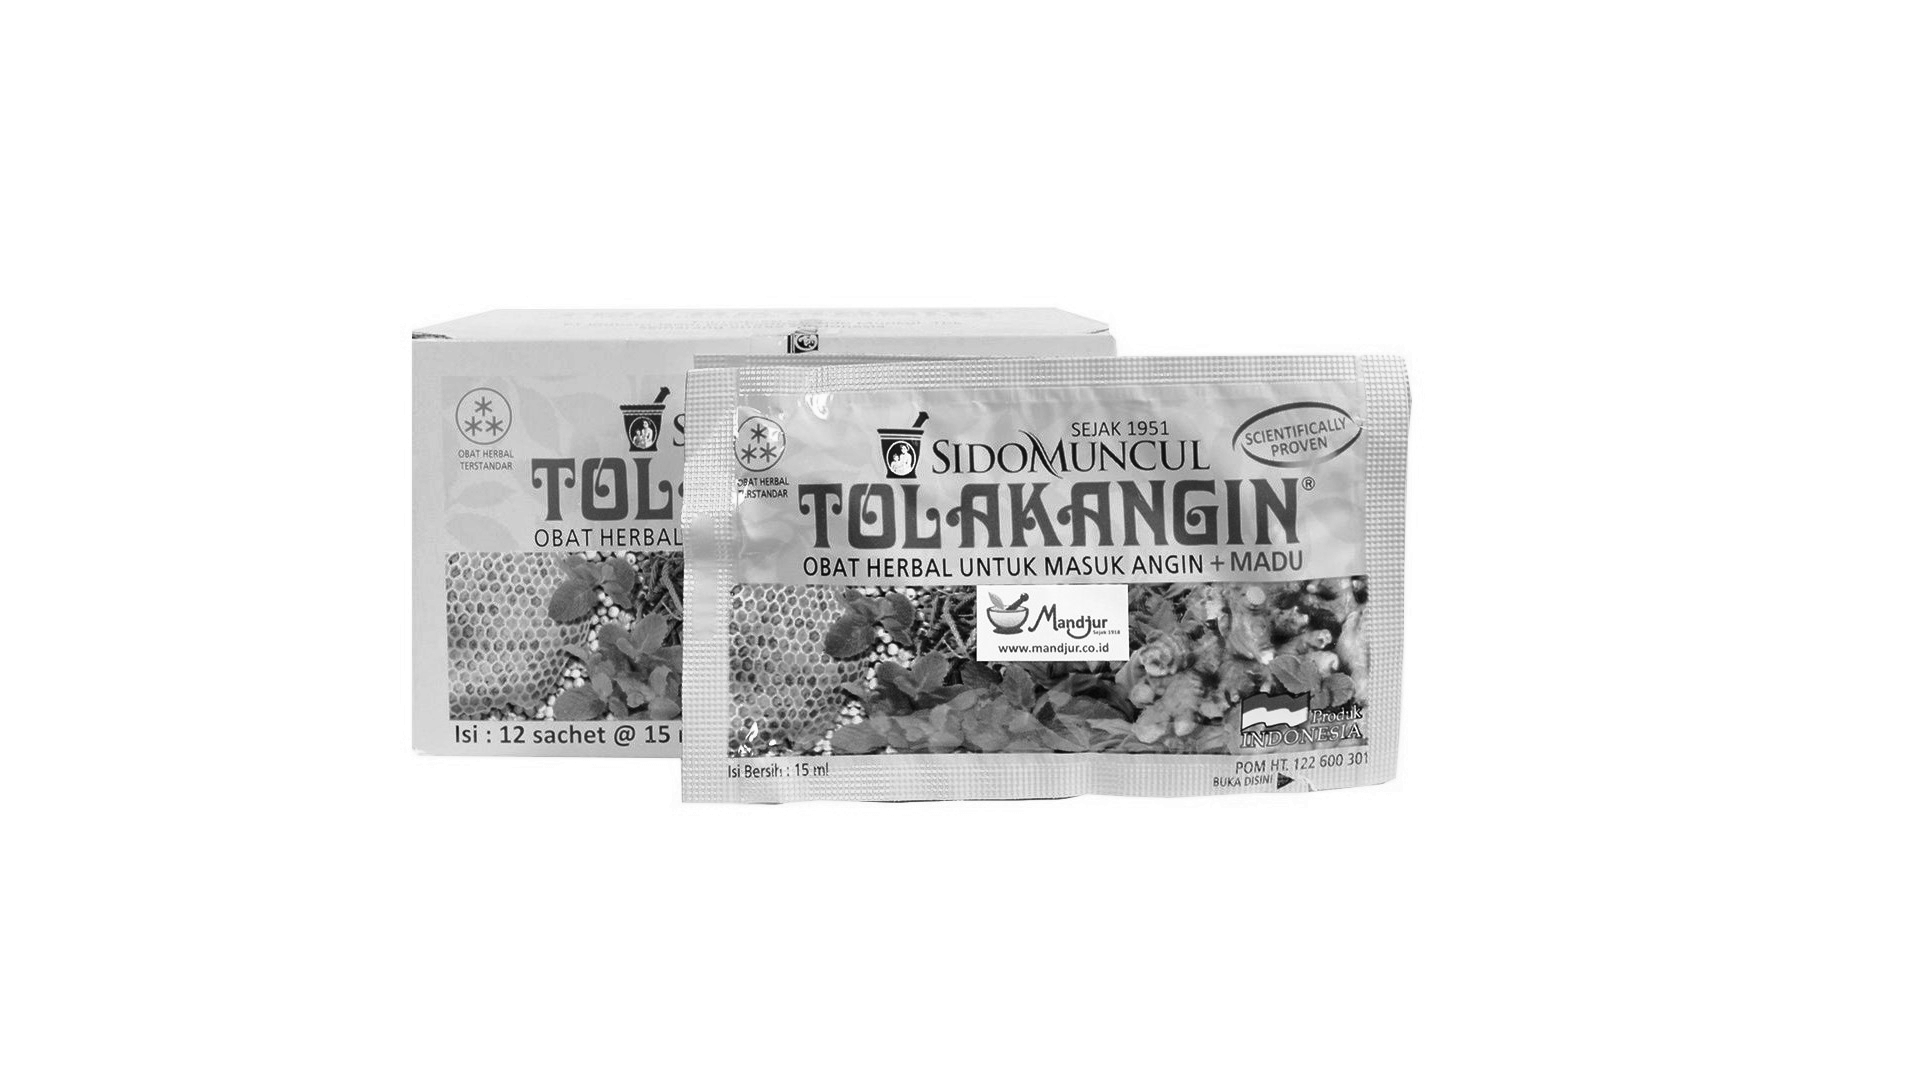

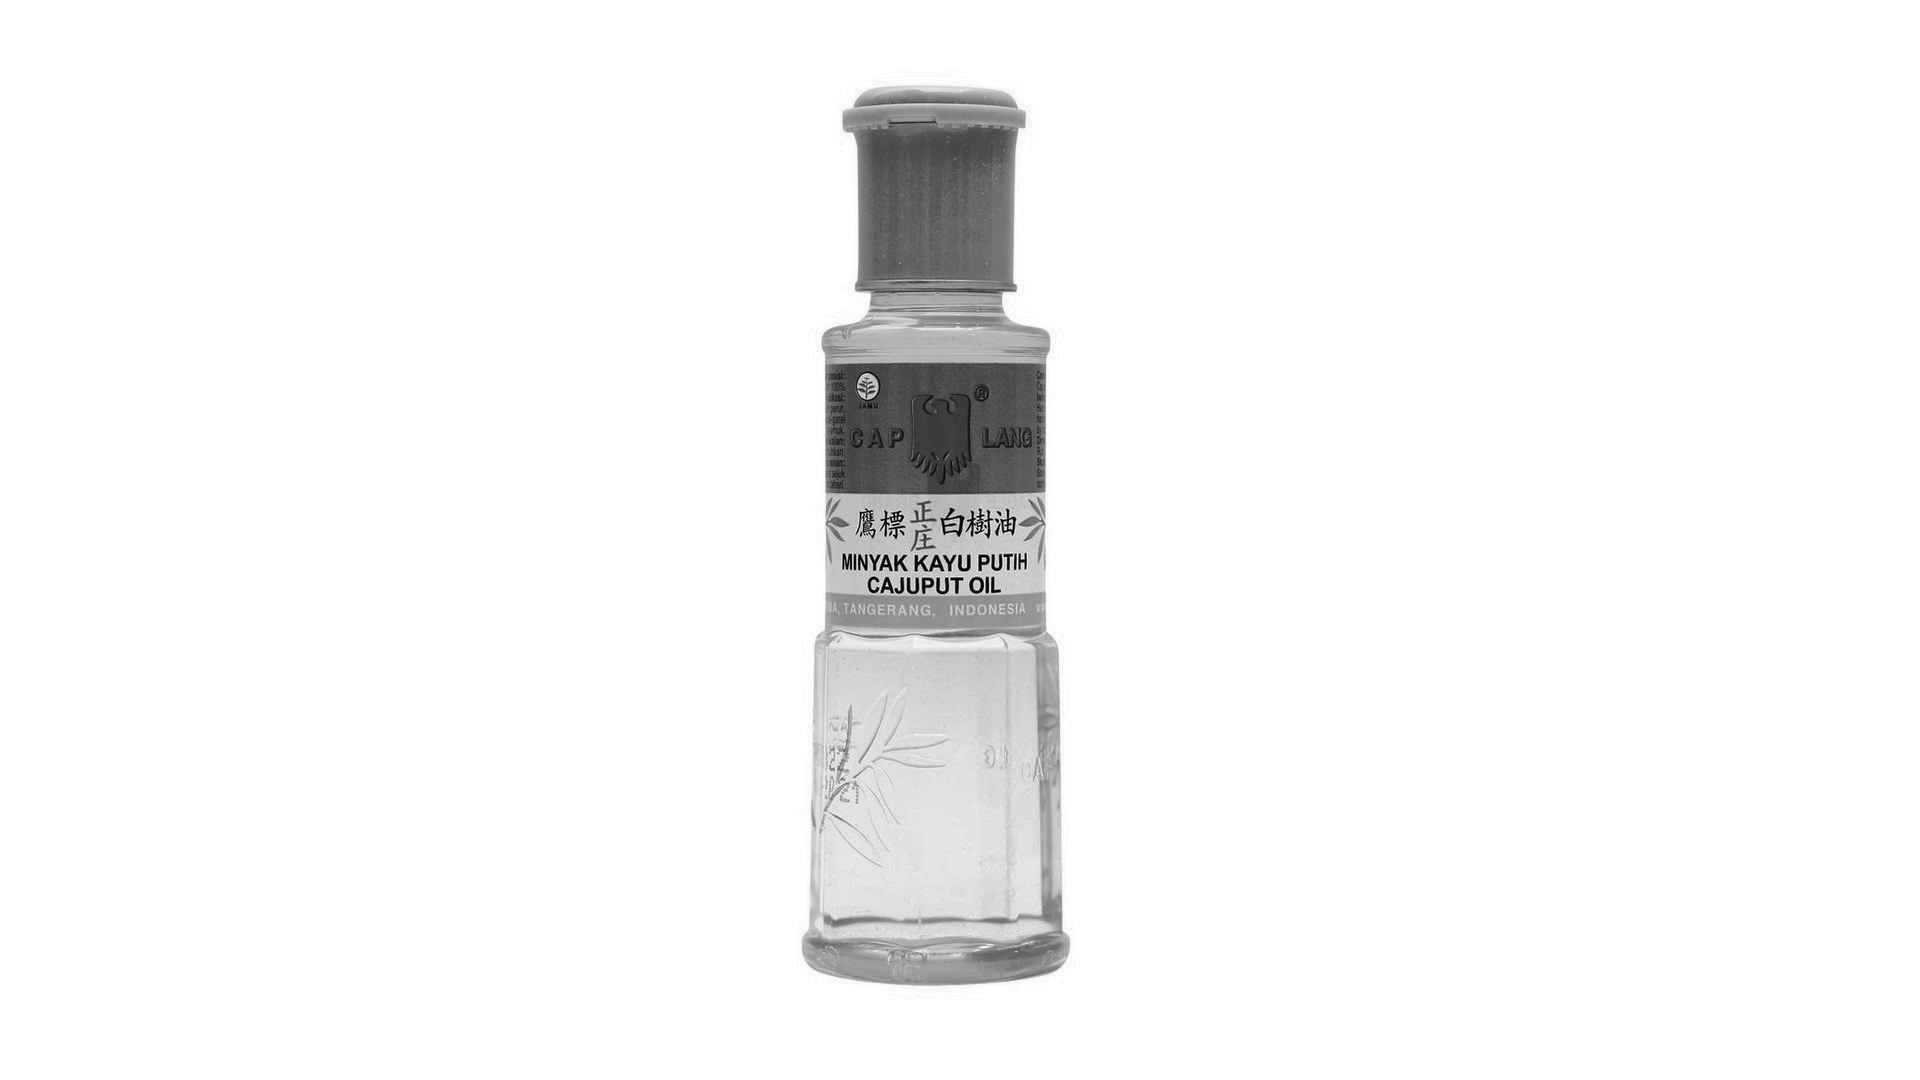

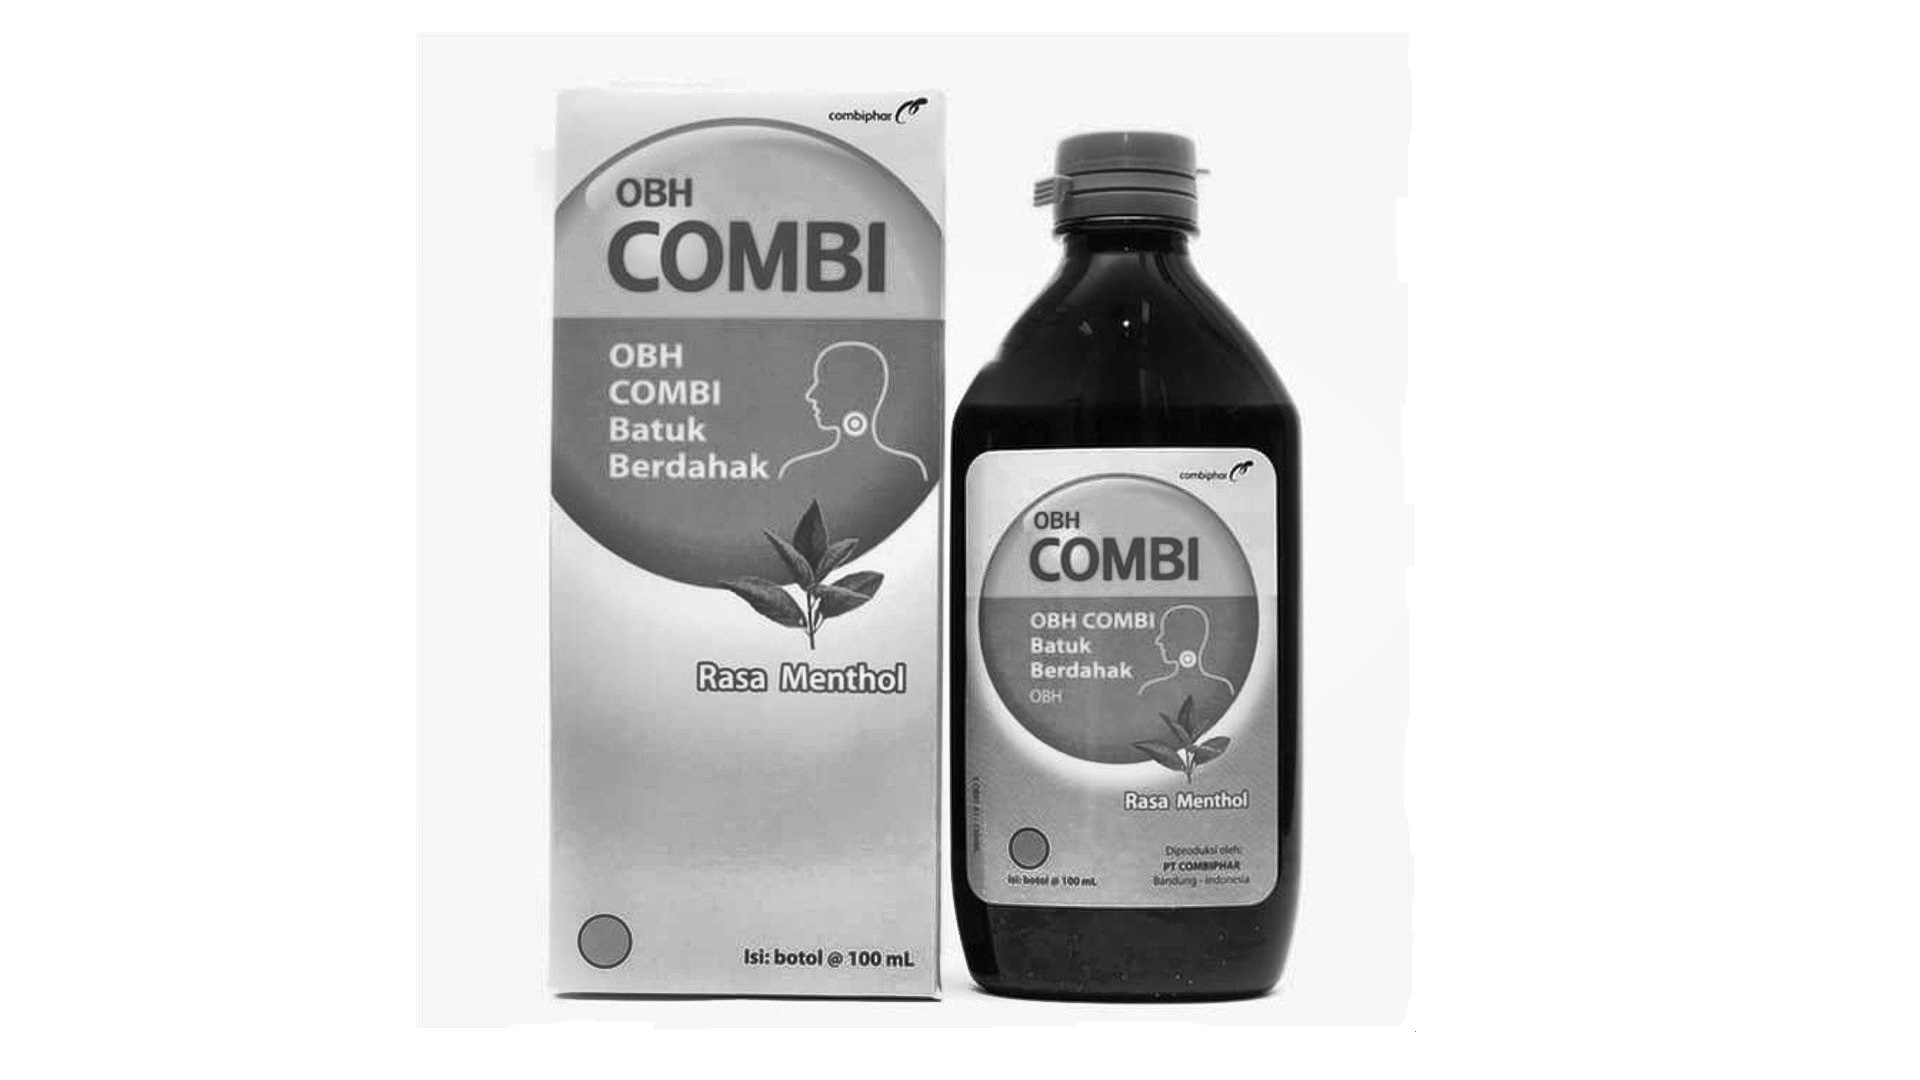

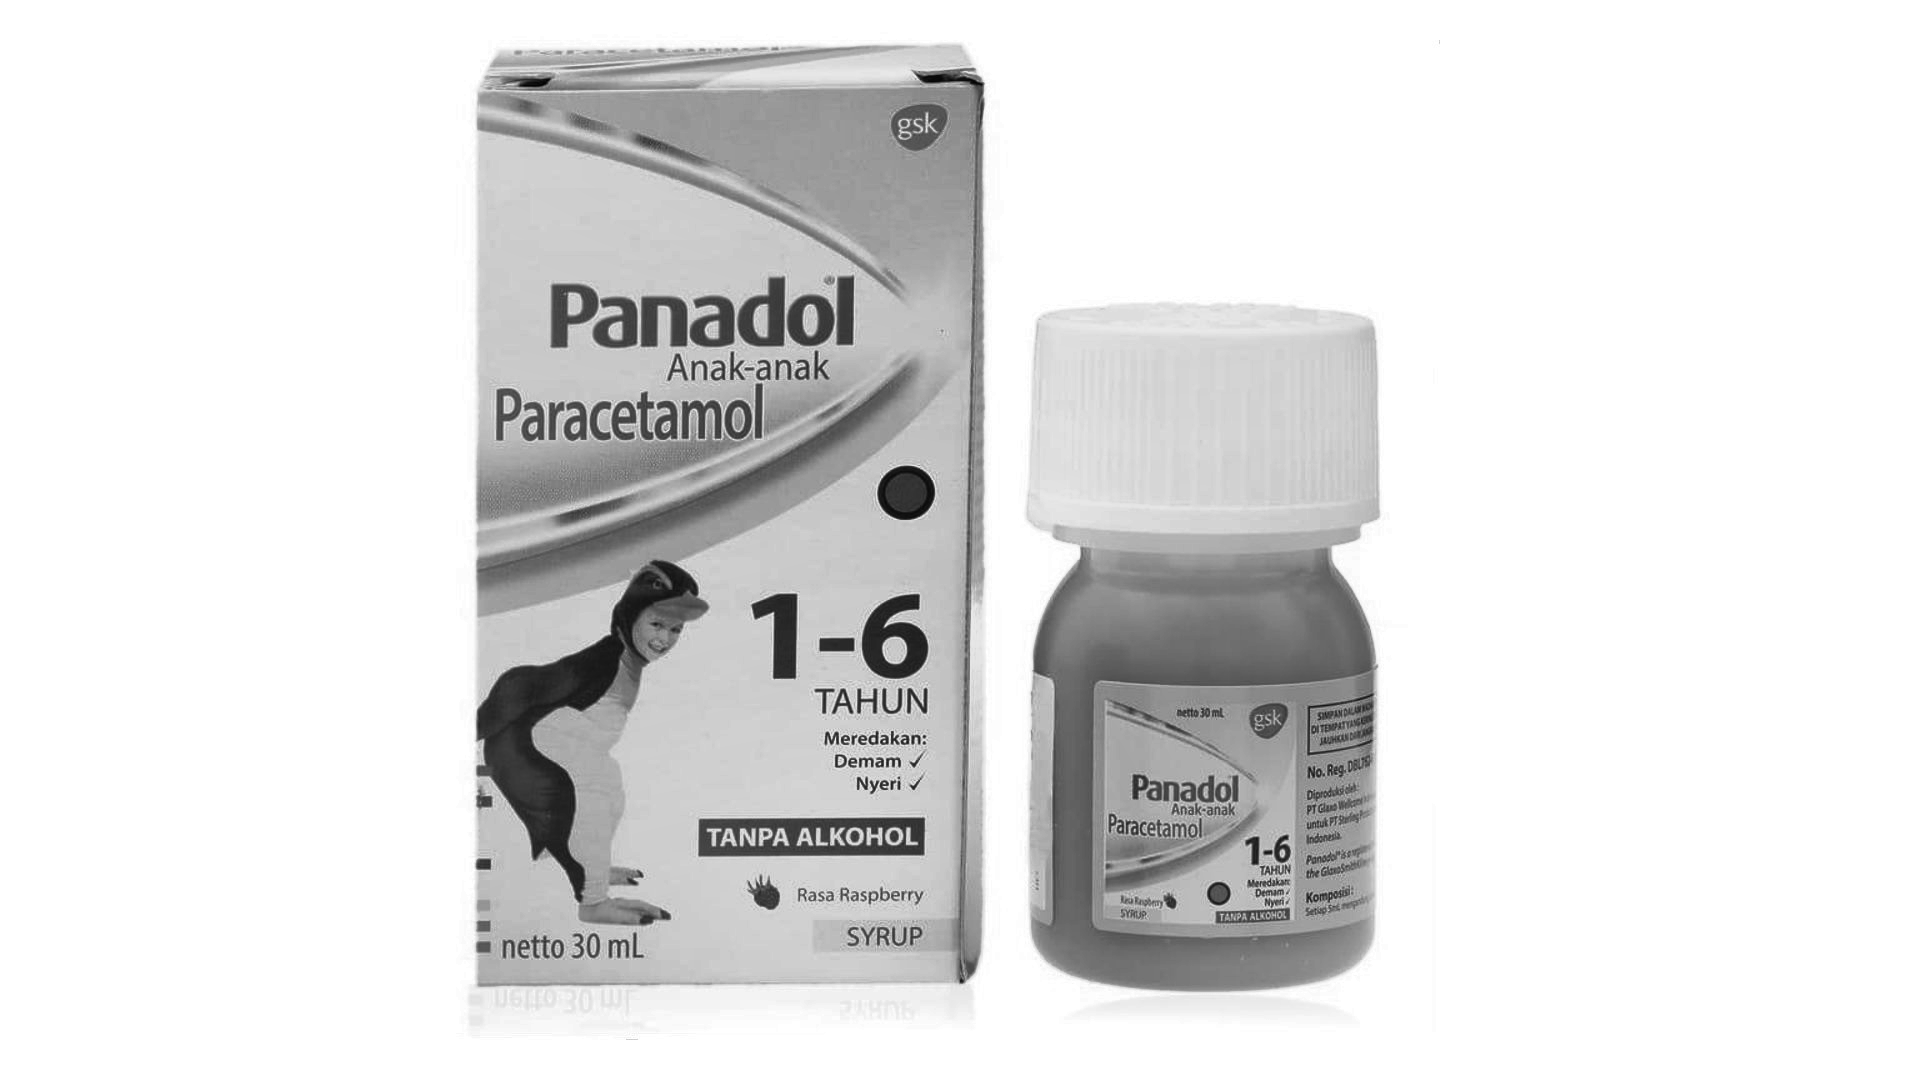

In [ ]:
base_path = 'Dataset'


inter_image = cv2.imread('Object.jpg')

inter_image = cv2.cvtColor(inter_image, cv2.COLOR_BGR2GRAY)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(3,3))

scene_images = []

for i in os.listdir(base_path):
    file = i.split('.')
    if file[1] == 'jpg':
        image_path = cv2.imread(base_path + '/' + i)
        image_path = cv2.cvtColor(image_path, cv2.COLOR_BGR2GRAY)
        image_path = clahe.apply(image_path)
        scene_images.append(image_path)
        cv2_imshow(image_path)

**Diatas saya memasukkan folder dataset yang berisi 10 buah gambar sample yang akan nantinya digunakan sebagai contoh gambar yang akan dimatching dengan gambar yang dedefine sebagai gambar inter_image lalu semua gambar tersebut saya convert ke grayscale dan saya memunculkan 10 gambar sample dengan cv_imshow**

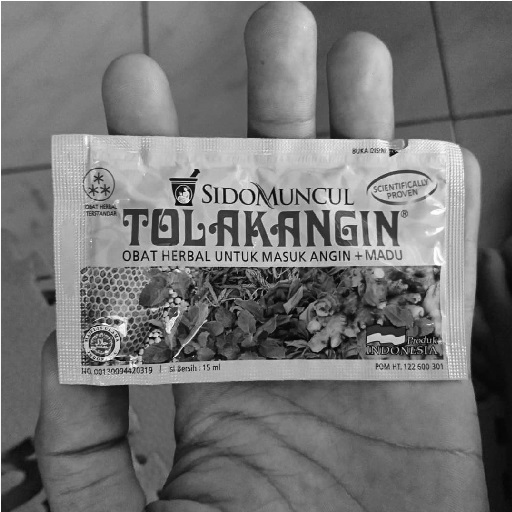

In [ ]:
cv2_imshow(inter_image)

In [ ]:
SIFT = cv2.SIFT_create()

# kp + ds inter image
inter_kp, inter_ds = SIFT.detectAndCompute(inter_image, None)

In [ ]:
KDTREE_INDEX = 1 #0 1 Dipake buat SIFT SURF, 5 dipake buat ORB
TREE_CHECKS = 50
FLANN = cv2.FlannBasedMatcher(dict(algorithm=KDTREE_INDEX), dict(checks=TREE_CHECKS))

In [ ]:
all_mask = []
scene_index = 1
total_match = 0
scene_keypoint = None
final_match = None

In [ ]:
for index, i in enumerate (scene_images):
    scene_kp, scene_ds = SIFT.detectAndCompute(i, None)
    matcher = FLANN.knnMatch(inter_ds, scene_ds, 2)

    scene_mask = [[0,0] for i in range(0, len(matcher))]
    match_count = 0
    # scene_mask = []
    # for j in range(0, len(matcher)):
    #     scene_mask.append([0,0])

    for j, (first_match, second_match) in enumerate(matcher):
        if first_match.distance < 0.7 * second_match.distance:
            scene_mask[j] = [1,0]
            match_count += 1

    all_mask.append(scene_mask)

    if total_match < match_count:
        total_match = match_count
        scene_index = index
        scene_keypoint = scene_kp
        final_match = matcher

In [ ]:
result = cv2.drawMatchesKnn(
    inter_image, inter_kp,
    scene_images[scene_index], scene_keypoint,
    final_match, None, 
    matchColor = [0, 255, 0],
    singlePointColor = [255, 0 , 0],
    matchesMask=all_mask[scene_index]
)

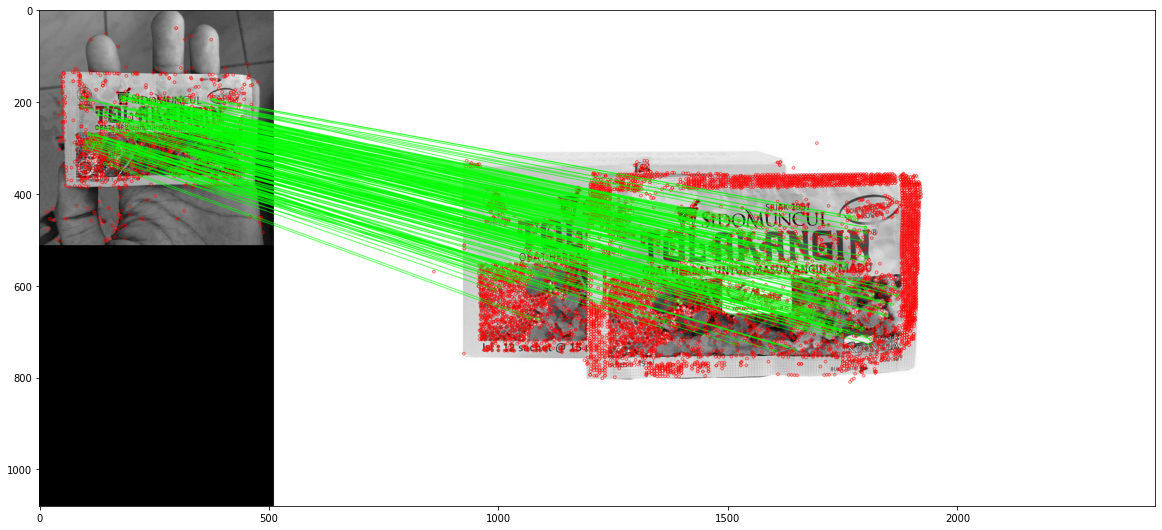

In [ ]:
plt.figure(figsize=(20, 20))
plt.imshow(result, cmap='gray')
plt.show()